## Jump-Ratio mit Hilfe von EELS erklären

Die Daten für dieses Script stammen von der Messung **``20150401 FeCr 125kX``**.

Dazu wurde mit ImageJ jeweils eine ROI auf eine Eisen- und eine Chrom-Schicht platziert und das zugehörige Spektrum aus dem ImgSpec Datensatz extrahiert.

Da die Daten von einer anderen Stelle der Probe stammen, muss ich die Intensität von Eisen mit dem Faktor 1.1 multipliziren, damit die Werte zu den ESI-Bildern beim Jump-Ratio-Beispiel passen.

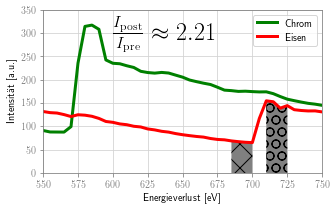

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def get_plot_Fe():
    data_fe = pd.read_csv('data/EELS_Fe.tsv', sep='\t')
    data_cr = pd.read_csv('data/EELS_Cr.tsv', sep='\t')
    
    data_fe['Y'] = data_fe['Y'] * 1.1 / 7.33
    data_cr['Y'] = data_cr['Y'] / 7.33

    pre = data_fe[(data_fe.X >= 684) & (data_fe.X <= 704)]
    post = data_fe[(data_fe.X >= 708) & (data_fe.X <= 728)]
    
    ratio = round(post['Y'].mean() / pre['Y'].mean(), 2)
    
    plt.figure(figsize=(5,3))
    plt.plot(data_cr['X'], data_cr['Y'], label='Chrom', color='g', linewidth=3)
    plt.plot(data_fe['X'], data_fe['Y'], label='Eisen', color='r', linewidth=3)
    plt.fill_between(pre.X, 0, pre.Y, hatch='x', facecolor='grey')
    plt.fill_between(post.X, 0, post.Y, hatch='O', facecolor='grey')
    plt.xlim(550, 750)
    plt.xlabel('Energieverlust [eV]')
    plt.ylim(0, 350)
    plt.ylabel('Intensität [a.u.]')
    plt.legend(loc=1)
    plt.text(600, 265, r'$\frac{I_{\mathrm{post}}}{I_{\mathrm{pre}}} \approx ' + str(ratio) + r'$', fontsize=24)
    return plt

get_plot_Fe().savefig('Bilder/Jump-Ratio_EELS-Fe')

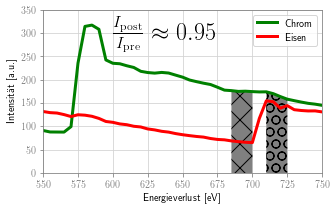

In [2]:
def get_plot_Cr():
    data_fe = pd.read_csv('data/EELS_Fe.tsv', sep='\t')
    data_cr = pd.read_csv('data/EELS_Cr.tsv', sep='\t')
    
    data_fe['Y'] = data_fe['Y'] * 1.1 / 7.33
    data_cr['Y'] = data_cr['Y'] / 7.33

    pre = data_cr[(data_cr.X >= 684) & (data_cr.X <= 704)]
    post = data_cr[(data_cr.X >= 708) & (data_cr.X <= 728)]
    
    ratio = round(post['Y'].mean() / pre['Y'].mean(), 2)

    plt.figure(figsize=(5,3))
    plt.plot(data_cr['X'], data_cr['Y'], label='Chrom', color='g', linewidth=3)
    plt.plot(data_fe['X'], data_fe['Y'], label='Eisen', color='r', linewidth=3)
    plt.fill_between(pre.X, 0, pre.Y, hatch='x', facecolor='grey')
    plt.fill_between(post.X, 0, post.Y, hatch='O', facecolor='grey')
    plt.xlim(550, 750)
    plt.xlabel('Energieverlust [eV]')
    plt.ylim(0, 350)
    plt.ylabel('Intensität [a.u.]')
    plt.legend(loc=1)
    plt.text(600, 265, r'$\frac{I_{\mathrm{post}}}{I_{\mathrm{pre}}} \approx ' + str(ratio) + r'$', fontsize=24)
    return plt

get_plot_Cr().savefig('Bilder/Jump-Ratio_EELS-Cr')